#                                             Anlysing Titanic data 

## Presentation:
In this project, we will investigate data related to titanic sinking. We want to investigate data and see what were the characteristics of people who died and people who survived. 
First, we need to get to know our data, by printing some examples and the type of each variable. Then we clean and reorganize the variables before proceeding to the part of answering our question and making vizualisation.
We will need to import pandas since we will be using our dataframes, and matplotlib to make some visualisations

### Getting to know our data 

In [77]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns


The first step is importing the data we have, which is called titanic-data, our file is a csv format, we will read it Then we read the csv into a DataFrame. for that we used the following function read_csv, we get a dataframe that we call titanic_data

In [78]:
titanic_data=pd.read_csv('titanic-data.csv')

First, let's get to know our data and what variables we have, to do so we print the header and the first three rows, we see that we have a list of passengers, with some personal information and other information like their survival.
           

In [79]:
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


So we have 12 variable, all variables do not have the same type. We can also use info function to specify the type of each variable

In [80]:
titanic_data.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We notice that we have some missing values for three variables, Age, Cabin and Embarkement, we will correct them if we need them.
We also notice that it is much better to actually represent the values of categorial variables by a string instead of an int, so we change the values of Survived, Pclass and embarked.

### Cleaning and reorganizing labels of variables 

In [81]:
titanic_data['Survived'].replace([0,1],['Died','Survivant'],inplace=True)

In [82]:
set(titanic_data['Survived'])

{'Died', 'Survivant'}

Survived variable will take two labels, Survived and Died.We procede the same thing with the other two variables. 

In [83]:
titanic_data['Pclass'].replace([1,2,3],['1st','2nd','3rd'],inplace=True)

In [84]:
titanic_data['Embarked'].replace(['C','Q','S'],['Cherbourg','Queenstown','Southampton'],inplace=True)

### Time to answer our question: What variables influence the survival of people who were on titanic ? 
What were the characteristics of people who survived and people who died, we can answer this question using one variable , or many at one time.
So 'Survived' will be our dependent variable, while 'Sex', 'Age' and 'Pclass' will be the dependent ones.
So we create a new table, where we fill the missing values of Age with the mean of the sex and Pclass combined, which is more specefic than just the mean of general population

In [85]:
new_titanic_data= titanic_data[['Survived','Sex','Age','Pclass']]

In [86]:
#we will fill our data with this mean ages, depends on where our missing value is located 
new_titanic_data.groupby(['Sex','Pclass'])['Age'].mean()

Sex     Pclass
female  1st       34.611765
        2nd       28.722973
        3rd       21.750000
male    1st       41.281386
        2nd       30.740707
        3rd       26.507589
Name: Age, dtype: float64

In [87]:
new_titanic_data["Age"].fillna(new_titanic_data.groupby(['Sex','Pclass'])["Age"].transform("mean"), inplace=True)


missing values for age is solved now, Lets see how many survivors and dead we have in both female and male population 

In [88]:
new_titanic_data.groupby(['Sex','Survived'])['Sex'].count()

Sex     Survived 
female  Died          81
        Survivant    233
male    Died         468
        Survivant    109
Name: Sex, dtype: int64

In [89]:
survivors_by_sex=new_titanic_data.groupby(['Sex','Survived'])['Sex'].count()

We create a graph to illustrate better the difference in surviving between men and women 

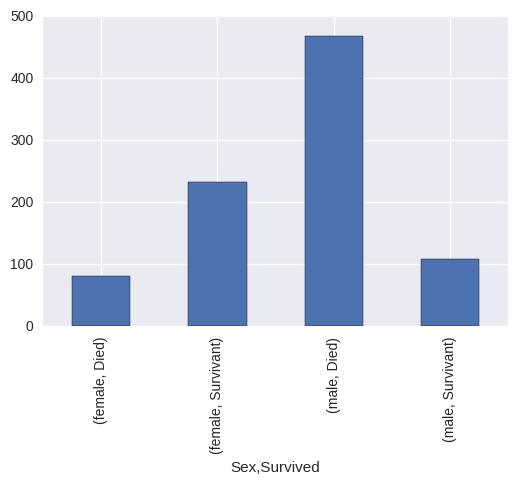

In [90]:
survivors_by_sex.plot(kind='bar')

we notice that three women from four survived, while only almost one in five men survived, that must be because women and children get evacuated first from the ship.

Lets investigate more our data, by creating two tables, one of the dead, and the other of survivants, it makes comparing easier

In [91]:
Survived_data=new_titanic_data.loc[new_titanic_data['Survived']=='Survivant']

In [92]:
Dead_data=new_titanic_data.loc[new_titanic_data['Survived']=='Died']

Now we can see how many women or male, each one belonging to a Pclass, survived or died.

In [93]:
Survived_data.groupby(['Sex','Pclass'])['Pclass'].count()

Sex     Pclass
female  1st       91
        2nd       70
        3rd       72
male    1st       45
        2nd       17
        3rd       47
Name: Pclass, dtype: int64

In [94]:
Survived_count=Survived_data.groupby(['Sex','Pclass'])['Pclass'].count()

In [95]:
Dead_data.groupby(['Sex','Pclass'])['Pclass'].count()


Sex     Pclass
female  1st         3
        2nd         6
        3rd        72
male    1st        77
        2nd        91
        3rd       300
Name: Pclass, dtype: int64

In [96]:
Dead_count=Dead_data.groupby(['Sex','Pclass'])['Pclass'].count()

To understand better the numbers, we plot each table 

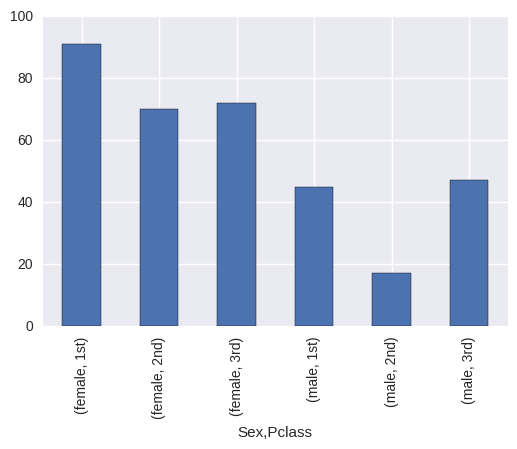

In [97]:
Survived_count.plot(kind="bar")


(0, 400)

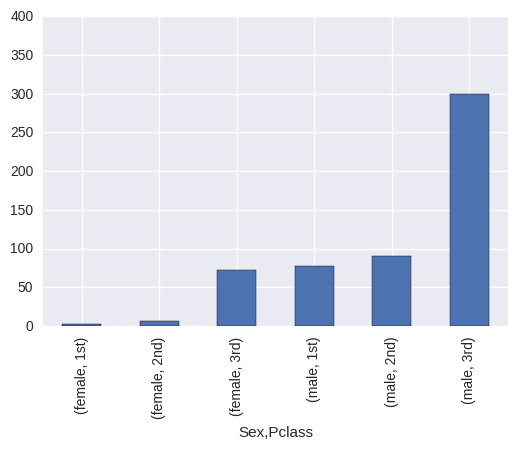

In [98]:
Dead_count.plot(kind='bar')
axes = plt.gca()
axes.set_ylim([0,400])

Comparing the two previous plots, we notice that almost all women from first to second class survived, while only half of women from third class survived (72/144). 
Men from third class had the worse luck, only one in ten men was rescued. 

We saw the proportion of survivors and deas based on their Sex and Class, lets add another variable which is the age.


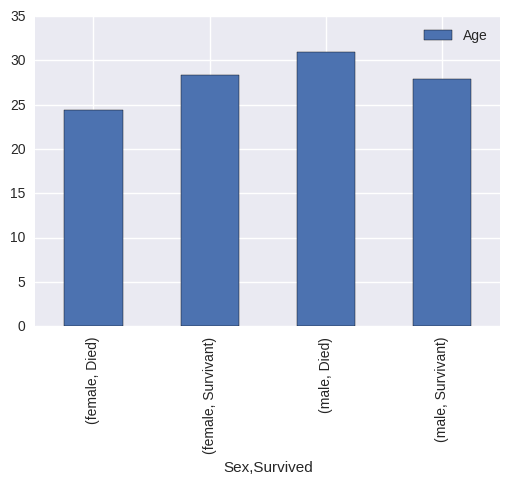

In [99]:
new_titanic_data.groupby(['Sex','Survived']).agg(lambda x:x.mean()).plot(kind='bar')

It seems that young female and old male where the ones who died, compared to younger male and older females.

Now we explore classes 

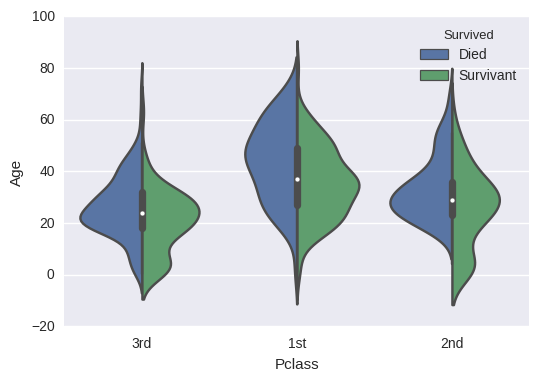

In [100]:
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=titanic_data, split=True,
              )
sns.despine(left=True)

it seems that survivants were the younger ones, especially when it came to the first class 

Since the mean can be misleading, lets explore more our data, by plotting a histogram and calculating the median

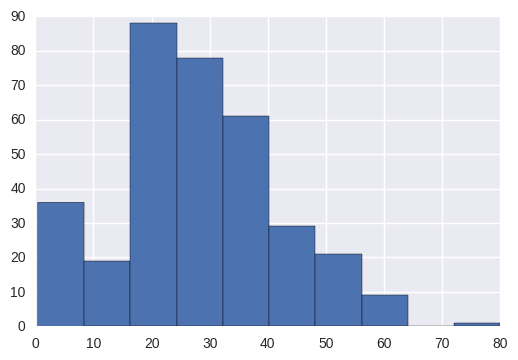

In [101]:
Survived_data['Age'].hist()


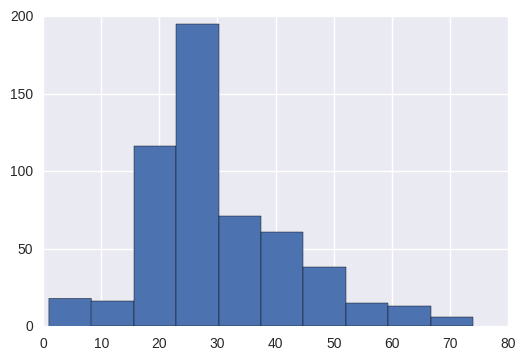

In [102]:
Dead_data['Age'].hist()

In [103]:
print 'median of survivors'
print Survived_data['Age'].median()
print 'median of dead population'
print Dead_data['Age'].median()


median of survivors
27.0
median of dead population
26.5075889328


Indeed , the mean was misleading, survivors were actually older generally than the median of dead people.
It means we need to explore more our data to see details about who survived and who didn't.
The following vizualisation is the mean age of each crossed categorie, survivors and Pclass 

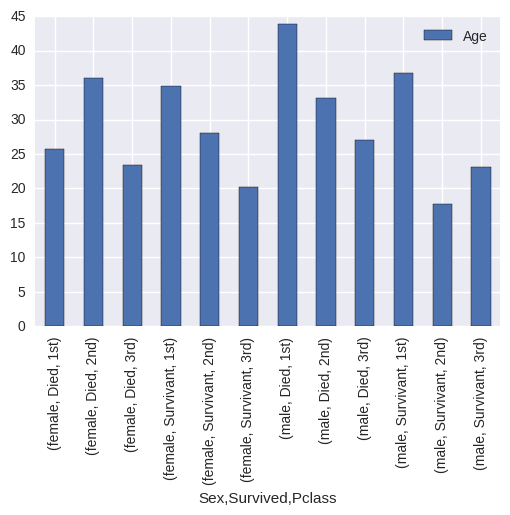

In [104]:
new_titanic_data.groupby(['Sex','Survived','Pclass']).agg(lambda x:x.mean()).plot(kind='bar')

We notice why the mean was misleading. Except female from first class, the mean age of survivors was less than the mean age of dead, from also the histogram of survivors we notice that a good number of people were children under 10. So the age of children ( bellow 10) made our mean of survivors less than the mean of dead, while in fact, most people who died were the youngers, half of dead were under 26 why half were under 27 years.

# Conclusion

To answer our question, which is what variables correlated to the surviving of titanic riders, we did a descriptive analysis after cleaning our data, along with some vizualisation. This helped us notice that sex, Class and  age correlated with surviving.This is showing in women and kids  who were resuced first, and that first and second class were among the survivors while old men from third class were the ones who presented the majority of the dead.
Maybe that men from third class were far from the boats, and sinked first, or because of their social status , they couldn't get on the boats. 
However, we can't say that these people survived because of their sex , age or class. To answer such question, we need to do an inference study , by comparing the mean age of survivors and dead and see if is the difference is significant or not using statistical text.

## Sources: 

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html
